# Let's import all our 'instruments' and check the data format

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Training_data_blood.csv')

In [3]:
train.head(3)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1


In [4]:
train.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


# Let's do some Exploratory Data Analysis

In [5]:
corr_matrix = train.corr()

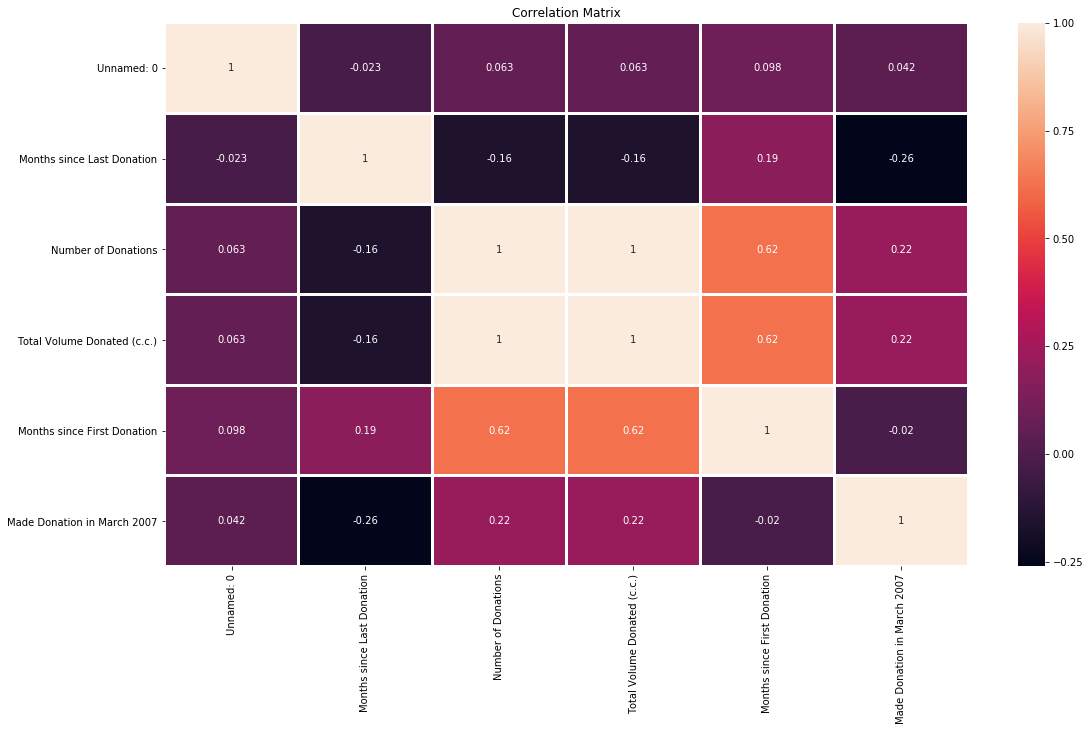

In [6]:
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix,linewidths=2.0, ax= ax , annot=True)
ax.set_title('Correlation Matrix')

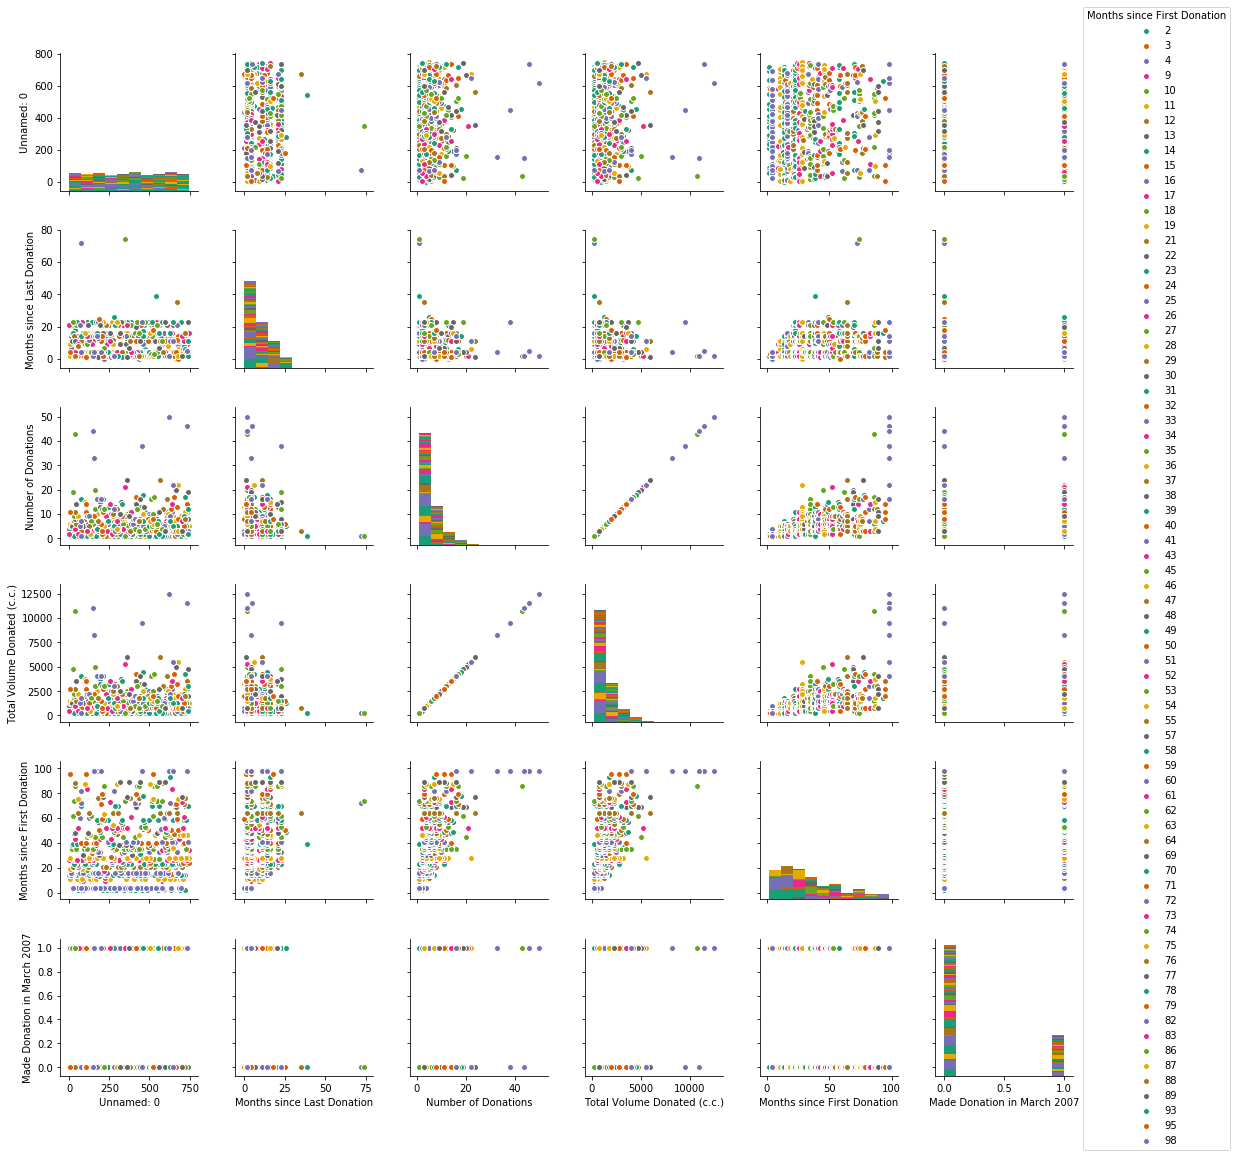

In [7]:
sns.pairplot(train,hue='Months since First Donation',palette='Dark2')

In [8]:
train.columns.values[0] = 'id'


In [9]:
train.head(3)

,id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1


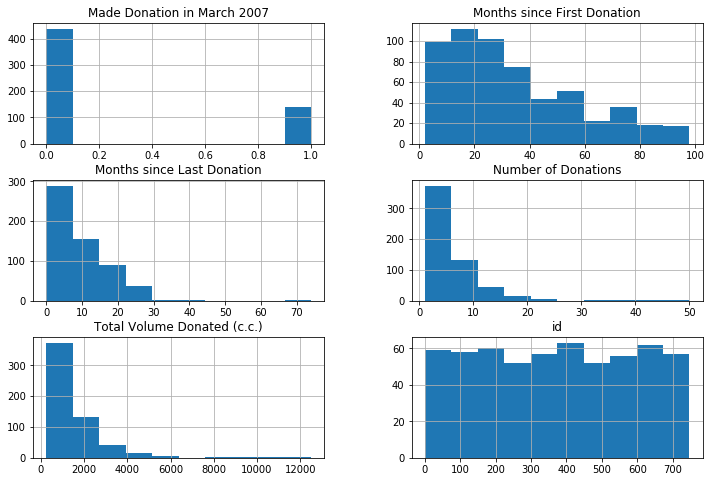

In [10]:
train.hist(figsize = (12,8))
plt.show()

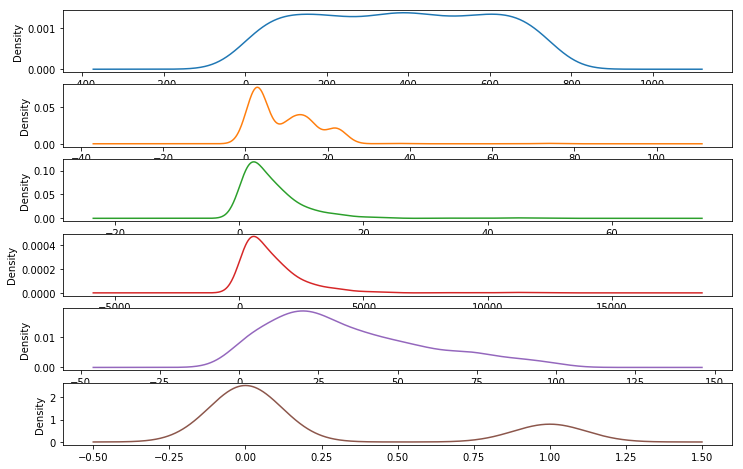

In [11]:
train.plot(kind='density', subplots=True,sharex=False, legend=False, figsize=(12, 8))
plt.show()

# Feature Engineering

In [12]:
train['blood_volume'] = train['Number of Donations'] * train['Total Volume Donated (c.c.)']
train['Donate'] = train['Months since Last Donation']* train['Months since First Donation']
train['donations_per_month'] = train['Number of Donations']/train['Months since First Donation']
train['tenure_ratio'] = train['Months since Last Donation']/train['Months since First Donation']
train.head()

,id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,blood_volume,Donate,donations_per_month,tenure_ratio
0,619,2,50,12500,98,1,625000,196,0.510204,0.020408
1,664,0,13,3250,28,1,42250,0,0.464286,0.000000
2,441,1,16,4000,35,1,64000,35,0.457143,0.028571
3,160,2,20,5000,45,1,100000,90,0.444444,0.044444
4,358,1,24,6000,77,0,144000,77,0.311688,0.012987


In [13]:
train.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [14]:
input_data = train[['Months since Last Donation', 'Number of Donations',
                    'Months since First Donation','donations_per_month','tenure_ratio']]                

# Building the models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
lg = LogisticRegression()

In [16]:
test = pd.read_csv("Test_data_blood.csv")

In [17]:
test['blood_volume'] = test['Number of Donations'] * test['Total Volume Donated (c.c.)']
test['Donate'] = test['Months since Last Donation']* test['Months since First Donation']
test['donations_per_month'] = test['Number of Donations']/test['Months since First Donation']
test['tenure_ratio'] = test['Months since Last Donation']/test['Months since First Donation']
test.head()


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,blood_volume,Donate,donations_per_month,tenure_ratio
0,659,2,12,3000,52,36000,104,0.230769,0.038462
1,276,21,7,1750,38,12250,798,0.184211,0.552632
2,263,4,1,250,4,250,16,0.250000,1.000000
3,303,11,11,2750,38,30250,418,0.289474,0.289474
4,83,4,12,3000,34,36000,136,0.352941,0.117647


In [18]:
test.describe()


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,blood_volume,Donate,donations_per_month,tenure_ratio
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000,18138.750000,355.760000,0.189959,0.452653
std,211.138231,7.61907,6.125224,1531.305955,25.111197,43434.585899,419.109336,0.126197,0.376200
min,1.000000,0.00000,1.000000,250.000000,2.000000,250.000000,0.000000,0.022989,0.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000,1000.000000,90.750000,0.090909,0.117081
50%,377.500000,7.00000,4.000000,1000.000000,31.000000,4000.000000,196.000000,0.162791,0.321765
75%,537.000000,14.00000,8.000000,2000.000000,52.000000,16000.000000,434.000000,0.250000,1.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000,420250.000000,2139.000000,0.562500,1.000000


In [19]:
test.columns.values[0] = 'id'
test.head()

,id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,blood_volume,Donate,donations_per_month,tenure_ratio
0,659,2,12,3000,52,36000,104,0.230769,0.038462
1,276,21,7,1750,38,12250,798,0.184211,0.552632
2,263,4,1,250,4,250,16,0.250000,1.000000
3,303,11,11,2750,38,30250,418,0.289474,0.289474
4,83,4,12,3000,34,36000,136,0.352941,0.117647


In [20]:
test.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(input_data, train['Made Donation in March 2007'], test_size=0.33, random_state=5)

In [22]:
lg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
test.head()

,id,Months since Last Donation,Number of Donations,Months since First Donation,blood_volume,Donate,donations_per_month,tenure_ratio
0,NaN,2,12,52,36000,104,0.230769,0.038462
1,NaN,21,7,38,12250,798,0.184211,0.552632
2,NaN,4,1,4,250,16,0.250000,1.000000
3,NaN,11,11,38,30250,418,0.289474,0.289474
4,NaN,4,12,34,36000,136,0.352941,0.117647


In [27]:
input_data2 = test[['Months since Last Donation', 'Number of Donations',
                    'Donate', 'donations_per_month','tenure_ratio']]

In [28]:
pred = lg.predict(input_data2)

In [42]:
predict =pd.DataFrame(pred)
predict.head()

,0
0,0
1,0
2,0
3,0
4,0


In [46]:
submission_format = pd.read_csv("BloodDonationSubmissionFormat.csv")  # Read in the submission format
col_names = submission_format.columns
col_names = ['',col_names[1]]
submission = pd.DataFrame(test['id'])
submission['pred'] = predict.columns.values[0]
submission.columns = col_names
submission.to_csv("submission1.csv", index=False)